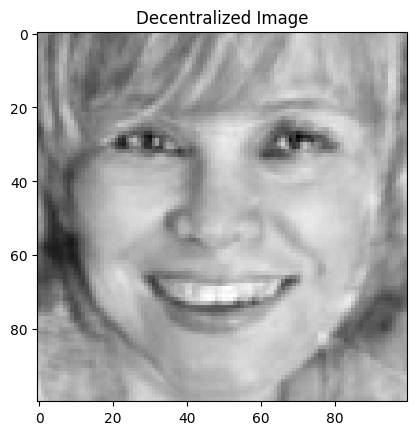

Distances from mean face: [4606.447069141249, 3308.233220436552, 3852.5173381569616, 4288.2269390506835, 7110.407380790499, 4492.552824486319, 6485.23381543025, 5004.165824670482, 3942.651027012155, 4158.423436928952, 5151.2291582495145, 5803.714975840905, 3523.1240285859935, 4209.651999963892, 3220.0612976774214, 3996.3512309105167, 4671.626457755371, 3522.780390657357, 6300.538427848845, 5948.555949203133, 4669.124539011569, 2946.1345727580065, 7118.163308101326, 5091.188819990868, 4810.75506348016, 4656.592771630348, 5925.754520801549, 3296.2032220116525, 3680.6273922797454, 3110.6722683047146, 4996.817615322777, 4473.6694782694885, 3843.421741209257, 5409.348171526769, 4493.56305405855, 3210.3252982836493, 3468.3614979987306, 2952.6755190504764, 3635.5138124892333, 5654.029826663457, 2866.287954968935, 4264.739560723491, 3142.88869685199, 4065.965528727463, 4309.781720783548, 3526.7957129383044, 8418.00119510564, 4106.1317709981, 4826.129318698371, 2673.358053235668]
Covariance Mat

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Input the face/picture

# Loading graph
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# Make sure the uploading path is correct
import os
images_folder = '/content/face_sample'
images = load_images_from_folder(images_folder)

# Check whether loading the image successfully
if len(images) == 0:
    raise Exception("No images found in the specified folder.")



# 2. collect the grayscale information of all images and stored in the matrix

# adjust all images to fixed size
image_shape = (100, 100)
resized_images = [cv2.resize(img, image_shape) for img in images]



# 3. Transform the matrix into column vector and store grayscale information
data_matrix = np.array([img.flatten() for img in resized_images])



# 4. Find the mean-face by calculate the average of all column vectors
mean_face = np.mean(data_matrix, axis=0)



# 5. Use PCA technology to decentralize the average, and then the decentralized image is displayed

pca = PCA(n_components=len(images))  # The number of components is the same as the number of images
pca.fit(data_matrix)

# Calculate the de-mean face
centered_data = data_matrix - mean_face
pca_transformed = pca.transform(centered_data)

# Restore the image after decentralization
reconstructed_faces = pca.inverse_transform(pca_transformed) + mean_face

# Displays the first image after decentralization
decentered_image = reconstructed_faces[0].reshape(image_shape)
plt.imshow(decentered_image, cmap='gray')
plt.title('Decentralized Image')
plt.show()


# 6. Calculate the similarity using Euclidean distance

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Calculate the distance of each training image from the average face
distances = [euclidean_distance(mean_face, img.flatten()) for img in resized_images]
print("Distances from mean face:", distances)



# 7. Calculate the covariance matrix

cov_matrix = np.cov(centered_data, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

# 8. Import new face images and predict their classification
new_face_path = '/content/new_face/25_1_0_20170105000803577.jpg.chip.jpg'
new_face = cv2.imread(new_face_path, cv2.IMREAD_GRAYSCALE)
if new_face is None:
    raise Exception("New face image not found.")

# Adjust the size of the new face
new_face_resized = cv2.resize(new_face, image_shape)

# Calculate the distance between the new face and the average face
new_face_distance = euclidean_distance(mean_face, new_face_resized.flatten())
print("Distance from mean face:", new_face_distance)

# set the threshold value
threshold = 1000
if new_face_distance < threshold:
    print("New face belongs to existing category.")
else:
    print("New face does not belong to existing category.")
